---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 4: Modelos climáticos globales </font>**
### **<font color="DodgerBlue"> Notebook 1: Xarray avanzado </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

## **<font color="ForestGreen">  ¿Por qué más Xarray? </font>**

Entre las diferentes bibliotecas que han emergido en Python para el análisis de datos geofísicos, hay una que se ha destacado en el campo de las Ciencias Atmosféricas y en el análisis de datos en formato NetCDF. En términos generales, Xarray es una biblioteca de Python poderosa y versátil diseñada para trabajar con _arreglos multidimensionales etiquetados_ y conjuntos de datos. En el contexto de las ciencias de la Tierra, Xarray es una herramienta invaluable para manejar datos complejos y multidimensionales, como series temporales, datos espaciales y climáticos. 

Algunos tipos de datos que son analizados con Xarray son:

1. Datos de reanálisis.
2. Datos de modelos climáticos. 
3. Datos satélite.
4. Datos de observaciones in-situ (Radares, lidars, etc). 
5. Datos cualquier modelo GEO (modelo de dinámica oceánica, dispersión de contaminantes, tiempo meteroloógico, etc). 

Algunas de las características clave de xarray que lo hacen especialmente útil en las ciencias de la Tierra son:

- Etiquetado de dimensiones y coordenadas: Xarray permite etiquetar dimensiones y coordenadas, lo que facilita la manipulación y el análisis de datos multidimensionales.

- Integración con formatos de datos comunes: Xarray se integra fácilmente con formatos de datos comunes en las ciencias de la Tierra, como archivos netCDF, lo que facilita la lectura, escritura y manipulación de estos datos.



In [1]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

### **<font color="ForestGreen">  Análisis de una simulación histórica de temperatura </font>**

Primero en este notebook vamos a analizar datos de una simulación del modelo HadGEM3 GC3.1-LL. Este modelo británico es producto de décadas de intensiva labor de toda la comunidad científica de un país en mejorar y entender a 1 único modelo. En contraste, los investigadores de EUA y Canadá han perseguido la filosofía de hacer varios modelos, con diferentes parametrizaciones, esquemas numéricos, etc, con la idea de con ello muestrear diferentes "espacios de parámetros" o sensibilidades a la configuración del modelo. 

**Datos de la simulación**

1. Actividad o Experimento: Histórico
2. Periodo: 1850-2014. Frecuentemente se analiza sólo 1979-2014 (y se compara con observaciones). 
3. Forzamientos: Naturales y antropogénicos completos, utilizando la serie de tiempo observada de emisión de GEIs, aerosoles, forzamiento solar, etc. 
4. Variable: temperatura superficial (temperatura del aire a 2-m de altura). 

Ustedes ya debieron haber descargado este archivo tipo NetCDF utilizando wget en la terminal.

#### **<font color="ForestGreen">  Abriendo datos en formato netcdf </font>**

La función de xarray, `xr.open_dataset()` , sirve para abrir datos en formato de netcdf https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html. 

El primer y único parámetro obligatorio de esta función es la ruta al archivo como un `str`. A este variable típicamente se le llama `filename`.


In [5]:
filename='tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

In [6]:
ds=xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 86MB
Dimensions:    (time: 780, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 12kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 86MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-06-19T12:07:37Z
    ...                     ...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/bc7c9a22-a05f-4154-9781-2b2cd934748e

Ahora bien, este objeto tipo `xarray.Dataset` tiene dimensiones, coordenadas, indices, atributos y variables. 

Podemos imprimir la lista de variables con el atributo de "variables".

In [7]:
ds.variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 780)> Size: 6kB
array([cftime.Datetime360Day(1950, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1950, 2, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1950, 3, 16, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2014, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2014, 12, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time, 'time_bnds': <xarray.Variable (time: 780, bnds: 2)> Size: 12kB
[1560 values with dtype=object], 'lat': <xarray.IndexVariable 'lat' (lat: 144)> Size: 1kB
array([-89.375, -88.125, -86.875, -85.625, -84.375, -83.125, -81.875, -80.625,
       -79.375, -78.125, -76.875, -75.625, -74.375, -73.125, -71.875, -70.625,
       -69.375, -68.125, -6

En Xarray, un dataset nos permite guardar datos de diferentes variables en un mismo dataset. Por ejemplo, dos variables: con las mismas dimensiones y coordenadas, pueden ser almacenadas de manera compacta en un mismo dataset, como lo muestra la propia imagen de ilustración de Xarray: 

![image-2.png](attachment:image-2.png)

Podemos seleccionar una de las variables en un dataset, por ejemplo la temperatura del aire, _temperature air surface (tas)_, y en general cualquier variable con la sintaxis:

`ds['varname']`

Que para nuestro ejemplo sería la siguiente instrucción:

In [8]:
tas=ds['tas']
tas
#dataset son varios dataarrays
#dataarray solo es uno jaja

<xarray.DataArray 'tas' (time: 780, lat: 144, lon: 192)> Size: 86MB
[21565440 values with dtype=float32]
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...

En el notebook 4.1 vimos algunos de los atributos principales de un Xarray, como el que selecciona las dimensiones de un objeto. 

In [9]:
tas.dims

('time', 'lat', 'lon')

Podemos inspeccionar un objeto de Xarray producto de un archivo NetCDF a través de los atributos de un xarray. DataArray o Dataset. Por ejemplo, podemos investigar cómo es la coordenada del tiempo.

In [10]:
tas.time

<xarray.DataArray 'time' (time: 780)> Size: 6kB
array([cftime.Datetime360Day(1950, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1950, 2, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1950, 3, 16, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2014, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2014, 12, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    height   float64 8B ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

O para la latitud:

In [11]:
lats=tas.lat
lats

<xarray.DataArray 'lat' (lat: 144)> Size: 1kB
array([-89.375, -88.125, -86.875, -85.625, -84.375, -83.125, -81.875, -80.625,
       -79.375, -78.125, -76.875, -75.625, -74.375, -73.125, -71.875, -70.625,
       -69.375, -68.125, -66.875, -65.625, -64.375, -63.125, -61.875, -60.625,
       -59.375, -58.125, -56.875, -55.625, -54.375, -53.125, -51.875, -50.625,
       -49.375, -48.125, -46.875, -45.625, -44.375, -43.125, -41.875, -40.625,
       -39.375, -38.125, -36.875, -35.625, -34.375, -33.125, -31.875, -30.625,
       -29.375, -28.125, -26.875, -25.625, -24.375, -23.125, -21.875, -20.625,
       -19.375, -18.125, -16.875, -15.625, -14.375, -13.125, -11.875, -10.625,
        -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,  -1.875,  -0.625,
         0.625,   1.875,   3.125,   4.375,   5.625,   6.875,   8.125,   9.375,
        10.625,  11.875,  13.125,  14.375,  15.625,  16.875,  18.125,  19.375,
        20.625,  21.875,  23.125,  24.375,  25.625,  26.875,  28.125,  29.375,
        30.625,  31.875,  33.125,  34.375,  35.625,  36.875,  38.125,  39.375,
        40.625,  41.875,  43.125,  44.375,  45.625,  46.875,  48.125,  49.375,
        50.625,  51.875,  53.125,  54.375,  55.625,  56.875,  58.125,  59.375,
        60.625,  61.875,  63.125,  64.375,  65.625,  66.875,  68.125,  69.375,
        70.625,  71.875,  73.125,  74.375,  75.625,  76.875,  78.125,  79.375,
        80.625,  81.875,  83.125,  84.375,  85.625,  86.875,  88.125,  89.375])
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
    height   float64 8B ...
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude

Las dimensiones y coordenadas1 de un arreglo pueden ser accesadas con el uso del punto, o a través de la siguiente sintaxis:

In [12]:
lons=tas['lon']
lons

<xarray.DataArray 'lon' (lon: 192)> Size: 2kB
array([  0.9375,   2.8125,   4.6875,   6.5625,   8.4375,  10.3125,  12.1875,
        14.0625,  15.9375,  17.8125,  19.6875,  21.5625,  23.4375,  25.3125,
        27.1875,  29.0625,  30.9375,  32.8125,  34.6875,  36.5625,  38.4375,
        40.3125,  42.1875,  44.0625,  45.9375,  47.8125,  49.6875,  51.5625,
        53.4375,  55.3125,  57.1875,  59.0625,  60.9375,  62.8125,  64.6875,
        66.5625,  68.4375,  70.3125,  72.1875,  74.0625,  75.9375,  77.8125,
        79.6875,  81.5625,  83.4375,  85.3125,  87.1875,  89.0625,  90.9375,
        92.8125,  94.6875,  96.5625,  98.4375, 100.3125, 102.1875, 104.0625,
       105.9375, 107.8125, 109.6875, 111.5625, 113.4375, 115.3125, 117.1875,
       119.0625, 120.9375, 122.8125, 124.6875, 126.5625, 128.4375, 130.3125,
       132.1875, 134.0625, 135.9375, 137.8125, 139.6875, 141.5625, 143.4375,
       145.3125, 147.1875, 149.0625, 150.9375, 152.8125, 154.6875, 156.5625,
       158.4375, 160.3125, 162.1875, 164.0625, 165.9375, 167.8125, 169.6875,
       171.5625, 173.4375, 175.3125, 177.1875, 179.0625, 180.9375, 182.8125,
       184.6875, 186.5625, 188.4375, 190.3125, 192.1875, 194.0625, 195.9375,
       197.8125, 199.6875, 201.5625, 203.4375, 205.3125, 207.1875, 209.0625,
       210.9375, 212.8125, 214.6875, 216.5625, 218.4375, 220.3125, 222.1875,
       224.0625, 225.9375, 227.8125, 229.6875, 231.5625, 233.4375, 235.3125,
       237.1875, 239.0625, 240.9375, 242.8125, 244.6875, 246.5625, 248.4375,
       250.3125, 252.1875, 254.0625, 255.9375, 257.8125, 259.6875, 261.5625,
       263.4375, 265.3125, 267.1875, 269.0625, 270.9375, 272.8125, 274.6875,
       276.5625, 278.4375, 280.3125, 282.1875, 284.0625, 285.9375, 287.8125,
       289.6875, 291.5625, 293.4375, 295.3125, 297.1875, 299.0625, 300.9375,
       302.8125, 304.6875, 306.5625, 308.4375, 310.3125, 312.1875, 314.0625,
       315.9375, 317.8125, 319.6875, 321.5625, 323.4375, 325.3125, 327.1875,
       329.0625, 330.9375, 332.8125, 334.6875, 336.5625, 338.4375, 340.3125,
       342.1875, 344.0625, 345.9375, 347.8125, 349.6875, 351.5625, 353.4375,
       355.3125, 357.1875, 359.0625])
Coordinates:
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...
Attributes:
    bounds:         lon_bnds
    units:          degrees_east
    axis:           X
    long_name:      Longitude
    standard_name:  longitude

Una vez que sabemos cómo son los datos, podemos empezar a procesarlos. 

### <font color="ForestGreen"> Slicing </font>

**Slicing** se refiere al proceso de seleccionar un subconjunto de datos a lo largo de una o más dimensiones de un conjunto de datos multidimensional. Es una operación fundamental que permite acceder y trabajar con partes específicas de los datos de manera eficiente.

### **<font color="ForestGreen">  Slicing con condición </font>**

En Xarray puedes realizar slicing a partir de condiciones. Para esto, es importante mencionar que esta sintaxis de slicing es ligeramente a la de la clase pasada. 

Una manera de hacer slicing es con el método  `xarray.DataArray.loc[condition]` o bien  `xarray.DataArray.loc[dict]`. 

In [13]:
# seleccionando solo latitudes al ecuador de 50
tas_sliced=tas.loc[dict(lat=lats[np.abs(lats)<50])]
tas_sliced.lat

<xarray.DataArray 'lat' (lat: 80)> Size: 640B
array([-49.375, -48.125, -46.875, -45.625, -44.375, -43.125, -41.875, -40.625,
       -39.375, -38.125, -36.875, -35.625, -34.375, -33.125, -31.875, -30.625,
       -29.375, -28.125, -26.875, -25.625, -24.375, -23.125, -21.875, -20.625,
       -19.375, -18.125, -16.875, -15.625, -14.375, -13.125, -11.875, -10.625,
        -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,  -1.875,  -0.625,
         0.625,   1.875,   3.125,   4.375,   5.625,   6.875,   8.125,   9.375,
        10.625,  11.875,  13.125,  14.375,  15.625,  16.875,  18.125,  19.375,
        20.625,  21.875,  23.125,  24.375,  25.625,  26.875,  28.125,  29.375,
        30.625,  31.875,  33.125,  34.375,  35.625,  36.875,  38.125,  39.375,
        40.625,  41.875,  43.125,  44.375,  45.625,  46.875,  48.125,  49.375])
Coordinates:
  * lat      (lat) float64 640B -49.38 -48.12 -46.88 ... 46.88 48.12 49.38
    height   float64 8B ...
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude

Otra manera es utilizando la función `where()` que busca dónde en un arreglo se cumple una condición. Si, además agregamos drop=True, quiere decir que nos deshacemos de todos los datos que no cumplan esta condición. 

In [14]:
tas_lon=tas.where(tas.lon>100,drop=True)
tas_lon #México está por 260°E

<xarray.DataArray 'tas' (time: 780, lat: 144, lon: 139)> Size: 62MB
array([[[249.67969, 249.68994, 249.67285, ..., 249.65942, 249.64502,
         249.63623],
        [248.5791 , 248.68823, 248.70044, ..., 251.094  , 251.06274,
         251.02368],
        [248.03833, 247.96362, 247.98926, ..., 251.71655, 251.57544,
         251.50024],
        ...,
        [238.08179, 238.12207, 238.18457, ..., 231.36157, 231.38672,
         231.40332],
        [236.67725, 236.70215, 236.74023, ..., 232.29956, 232.29858,
         232.3728 ],
        [234.84448, 234.84204, 234.85767, ..., 233.17432, 233.17383,
         233.16455]],

       [[231.5935 , 231.59253, 231.5918 , ..., 231.87549, 231.85156,
         231.84009],
        [229.7268 , 229.7605 , 229.84937, ..., 233.56006, 233.46387,
         233.38428],
        [228.97656, 229.09204, 229.24072, ..., 234.82007, 234.6416 ,
         234.46509],
...
        [246.5769 , 246.53296, 246.50244, ..., 246.6814 , 246.6604 ,
         246.60767],
        [245.92236, 245.90186, 245.90234, ..., 246.19775, 246.1211 ,
         246.09521],
        [244.85767, 244.85913, 244.844  , ..., 244.98364, 244.969  ,
         244.96997]],

       [[254.93164, 254.91016, 254.90479, ..., 255.2439 , 255.24292,
         255.25146],
        [253.93335, 253.88794, 253.84814, ..., 256.48584, 256.45728,
         256.43042],
        [253.50854, 253.46484, 253.44214, ..., 257.3828 , 257.27808,
         257.1858 ],
        ...,
        [245.79419, 245.69116, 245.56567, ..., 245.22241, 245.27759,
         245.28564],
        [245.9458 , 245.90845, 245.81592, ..., 245.1687 , 245.15625,
         245.16138],
        [245.09204, 245.08154, 245.08716, ..., 245.07251, 245.0791 ,
         245.06372]]], dtype=float32)
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 1kB 100.3 102.2 104.1 105.9 ... 355.3 357.2 359.1
    height   float64 8B 1.5
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...

A continuación se muestra un ejemplo utilizando el método `.sel()` que funciona utilizando como argumentos los nombres de las dimensiones con la estructura o sintaxis general:

`xr.DataArray.sel(dim=slice(dim0,dimf))`

donde slice es una función que agilmente puede hacer un intervalo de coordenadas en los cuáles se puede rebanar el DataArray definido como el punto de inicio del intervalo dim0 y el punto final dimf.

Para leer más:
https://docs.xarray.dev/en/latest/generated/xarray.DataArray.sel.html.

In [15]:
arr_sliced = tas.sel(lat=slice(-45, 45))
print(arr_sliced)

<xarray.DataArray 'tas' (time: 780, lat: 72, lon: 192)> Size: 43MB
[10782720 values with dtype=float32]
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 576B -44.38 -43.12 -41.88 ... 41.88 43.12 44.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...


In [16]:
arr_sliced = tas.sel(lat=slice(6,10))#,datetime.datetime(2010,1,1)))
print(arr_sliced)

<xarray.DataArray 'tas' (time: 780, lat: 3, lon: 192)> Size: 2MB
[449280 values with dtype=float32]
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 24B 6.875 8.125 9.375
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...


`datetime` es un módulo en Python que proporciona clases para manipular fechas y horas de una manera simple y eficiente. La relación entre `datetime` y `xarray` radica en cómo se utilizan conjuntamente para manejar datos con componentes de tiempo en `xarray`. 

Podemos acceder a las propiedades de datetime de un objeto de xarray a través del método `.dt`. Por ejemplo:

In [17]:
tas.time.dt

El objeto `xarray.core.accessor_dt.DatetimeAccessor` proporciona una serie de atributos y métodos para acceder y manipular componentes de fecha y hora en un objeto `xarray.DataArray`. Aquí hay algunos de los atributos más comunes de DatetimeAccessor:

- year: Devuelve el año de las fechas en el objeto DataArray.

- month: Devuelve el mes (entero) de las fechas en el objeto DataArray.

- day: Devuelve el día del mes de las fechas en el objeto DataArray.

- hour: Devuelve la hora del día de las fechas en el objeto DataArray.

- minute: Devuelve el minuto de la hora de las fechas en el objeto DataArray.

- second: Devuelve el segundo del minuto de las fechas en el objeto DataArray.

- microsecond: Devuelve el microsegundo del segundo de las fechas en el objeto DataArray.

- nanosecond: Devuelve el nanosegundo del segundo de las fechas en el objeto DataArray.

In [18]:
tas.time.dt.month

<xarray.DataArray 'month' (time: 780)> Size: 6kB
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    height   float64 8B ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [19]:
tas.time.dt.dayofyear

<xarray.DataArray 'dayofyear' (time: 780)> Size: 6kB
array([ 16,  46,  76, ..., 286, 316, 346])
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    height   float64 8B ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [20]:
tas.time.dt.season

<xarray.DataArray 'season' (time: 780)> Size: 9kB
array(['DJF', 'DJF', 'MAM', ..., 'SON', 'SON', 'DJF'], dtype='<U3')
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    height   float64 8B ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [21]:
tas_tiempo=tas.where(tas.time.dt.year>1990,drop=True)
tas_tiempo

<xarray.DataArray 'tas' (time: 288, lat: 144, lon: 192)> Size: 32MB
array([[[249.85425, 249.84692, 249.86377, ..., 249.86694, 249.87793,
         249.8706 ],
        [250.52588, 250.46753, 250.3938 , ..., 250.7378 , 250.69531,
         250.60718],
        [250.95483, 250.8418 , 250.78638, ..., 251.32837, 251.22705,
         251.11157],
        ...,
        [238.66699, 238.83081, 239.0315 , ..., 238.14233, 238.2898 ,
         238.50952],
        [237.23999, 237.32764, 237.3894 , ..., 236.95898, 237.03271,
         237.15845],
        [236.07495, 236.10449, 236.1106 , ..., 235.97168, 235.98462,
         236.0149 ]],

       [[236.43848, 236.4065 , 236.42554, ..., 236.49243, 236.48315,
         236.4602 ],
        [236.43042, 236.3352 , 236.32715, ..., 236.5752 , 236.552  ,
         236.44653],
        [236.58813, 236.49805, 236.40869, ..., 236.93823, 236.77832,
         236.67383],
...
        [246.59863, 246.52808, 246.4773 , ..., 246.6814 , 246.6604 ,
         246.60767],
        [246.06665, 246.00195, 245.96558, ..., 246.19775, 246.1211 ,
         246.09521],
        [244.94751, 244.95093, 244.96948, ..., 244.98364, 244.969  ,
         244.96997]],

       [[255.26025, 255.26733, 255.27295, ..., 255.2439 , 255.24292,
         255.25146],
        [256.39697, 256.3601 , 256.32056, ..., 256.48584, 256.45728,
         256.43042],
        [257.0935 , 257.0078 , 256.97485, ..., 257.3828 , 257.27808,
         257.1858 ],
        ...,
        [245.32642, 245.38623, 245.3872 , ..., 245.22241, 245.27759,
         245.28564],
        [245.15381, 245.16748, 245.18384, ..., 245.1687 , 245.15625,
         245.16138],
        [245.0752 , 245.04639, 245.0376 , ..., 245.07251, 245.0791 ,
         245.06372]]], dtype=float32)
Coordinates:
  * time     (time) object 2kB 1991-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B 1.5
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1 - Recorte de datos </font>**

<font color="DarkBlue"> 1. Haga un slice del arreglo `tas`, donde recorte la temperatura del aire para un recuadro centrado en el Oceano Índico.
    
<font color="DarkBlue"> 2. Seleccione sólo los datos correspondientes al período de Diciembre-Enero-Febrero.
        
Utilice dos métodos de selección diferentes.
    
---

In [22]:
oceano_lat = tas.sel(lat=slice(-20, 30))
oceano_long = oceano_lat.sel(lon=slice(40, 120))

In [23]:
slice_final = oceano_long[(oceano_long.time.dt.season=='DJF')]
slice_final

<xarray.DataArray 'tas' (time: 195, lat: 40, lon: 43)> Size: 1MB
[335400 values with dtype=float32]
Coordinates:
  * time     (time) object 2kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 320B -19.38 -18.12 -16.88 ... 26.88 28.12 29.38
  * lon      (lon) float64 344B 40.31 42.19 44.06 45.94 ... 115.3 117.2 119.1
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...

### <font color="ForestGreen"> Operaciones a lo largo de dimensiones </font>

En Xarray, las operaciones a lo largo de dimensiones son una parte fundamental para trabajar con datos multidimensionales de manera eficiente. Estas operaciones permiten realizar cálculos estadísticos, de agregación y manipulación de datos a lo largo de dimensiones específicas de un DataArray. Las operaciones más comunes que se pueden realizar a lo largo de dimensiones en un objeto DataArray son:

- Media (mean()): Calcula la media a lo largo de una o varias dimensiones especificadas.

- Suma (sum()): Calcula la suma de los valores a lo largo de una o varias dimensiones especificadas.

- Mínimo (min()): Encuentra el valor mínimo a lo largo de una o varias dimensiones especificadas.

- Máximo (max()): Encuentra el valor máximo a lo largo de una o varias dimensiones especificadas.

- Desviación estándar (std()): Calcula la desviación estándar a lo largo de una o varias dimensiones especificadas.

- Mediana (median()): Calcula la mediana a lo largo de una o varias dimensiones especificadas.

- Percentiles (quantile(q)): Calcula el percentil especificado a lo largo de una o varias dimensiones especificadas.

- Varianza (var()): Calcula la varianza a lo largo de una o varias dimensiones especificadas.

- Conteo (count()): Cuenta el número de valores válidos a lo largo de una o varias dimensiones especificadas.

- Producto (prod()): Calcula el producto de los valores a lo largo de una o varias dimensiones especificadas.

- Diferencia (diff()): Calcula la diferencia entre valores adyacentes a lo largo de una dimensión especificada.

- Integral (integrate(), cumsum(), cumtrapz()): Calcula la integral a lo largo de una dimensión especificada, ya sea mediante sumas acumulativas (cumsum()) o mediante la regla del trapecio (cumtrapz()).

Cada una de estas operaciones puede ser útil en diferentes contextos de análisis de datos multidimensionales, permitiendo realizar cálculos estadísticos y de agregación de manera eficiente y flexible.

In [24]:
tas.mean('time')

<xarray.DataArray 'tas' (lat: 144, lon: 192)> Size: 111kB
array([[227.18353, 227.19351, 227.20134, ..., 227.18213, 227.18462,
        227.18736],
       [228.62073, 228.54483, 228.4702 , ..., 228.87825, 228.78728,
        228.70016],
       [229.64108, 229.5127 , 229.39229, ..., 230.10432, 229.9357 ,
        229.78069],
       ...,
       [253.79936, 253.83119, 253.86198, ..., 253.7002 , 253.73291,
        253.76736],
       [253.54474, 253.55841, 253.57379, ..., 253.49469, 253.51349,
        253.52895],
       [253.36438, 253.36768, 253.37064, ..., 253.35648, 253.35962,
        253.36183]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...

In [25]:
tas.mean('lon')

<xarray.DataArray 'tas' (time: 780, lat: 144)> Size: 449kB
array([[249.77228, 250.27046, 251.35065, ..., 234.69087, 234.40051,
        233.96802],
       [232.0435 , 232.28435, 234.34532, ..., 233.86371, 233.49414,
        233.15623],
       [219.19133, 219.64632, 223.37544, ..., 236.88075, 236.49792,
        236.23608],
       ...,
       [225.36566, 225.68672, 228.14806, ..., 252.9148 , 253.01414,
        253.00653],
       [243.18626, 243.23767, 244.77545, ..., 246.19768, 245.88307,
        244.96039],
       [254.91747, 254.9967 , 255.92949, ..., 244.61023, 244.85774,
        244.89105]], dtype=float32)
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
    height   float64 8B ...

In [26]:
tz_tas=tas.mean(['lon','time'])


In [27]:
lats=tz_tas.lat

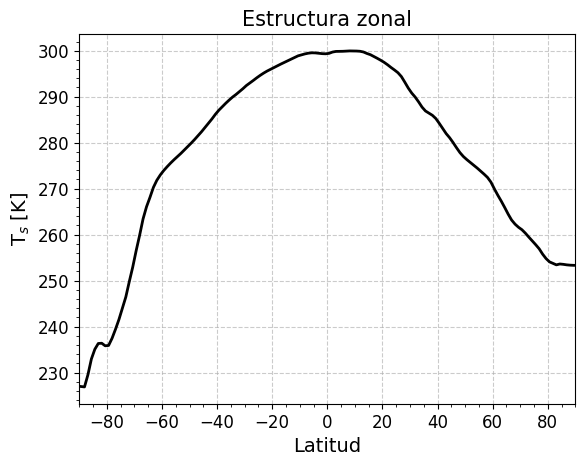

In [28]:
plt.plot(lats,tz_tas,c='k',linewidth=2)
lineplot_setup(-90,90,'Latitud','T$_s$ [K]',title='Estructura zonal')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 2 - Operaciones con datos </font>**

<font color="DarkBlue"> 1. Calcule la desviación estándar del campo de temperatura superficial tropical (10S-10N) a lo largo de la dimensión de  la longitud. Es decir, calcule la desviación estándar a lo largo de las otras dos dimensiones.
    
<font color="DarkBlue"> 2. Grafique la desviación estándar resultante como función de la longitud.
    
---

In [29]:
new_lat = tas.sel(lat=slice(-10, 10))
std_new = new_lat.std(['lat', 'time'])

In [30]:
long=std_new.lon

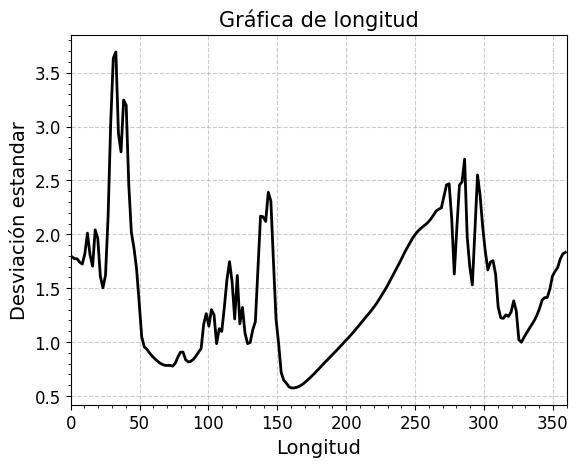

In [31]:
plt.plot(long,std_new,c='k',linewidth=2)
lineplot_setup(0,360,'Longitud','Desviación estandar',title='Gráfica de longitud')

### **<font color="ForestGreen"> Modificando la resolución de los datos </font>**

Xarray tiene además la capacidad de modificar la resolución espacial y temporal de los datos fácilmente. Veremos la segunda con el método de `resample()`. El método `resample()` en Xarray se utiliza para cambiar la frecuencia temporal de los datos mediante un proceso de re-muestreo. Esto es útil cuando tienes datos con una frecuencia temporal original y deseas cambiarla a una frecuencia diferente, ya sea para hacer análisis más fácilmente o para comparar los datos con otras series temporales que tienen una frecuencia diferente.

El método resample() opera de manera similar a cómo lo hace en Pandas. Toma como argumento un string que indica la nueva frecuencia deseada para los datos y luego aplica un proceso de agregación o interpolación para ajustar los datos a esa nueva frecuencia.

1. Agregación: Si la nueva frecuencia es una agregación (por ejemplo, de mensual a anual), el método resample() calculará el promedio, la suma u otra estadística sobre los datos en cada nuevo intervalo de tiempo.

2. Interpolación: Si la nueva frecuencia es una interpolación (por ejemplo, de mensual a diario), el método resample() calculará valores intermedios basados en una interpolación de los datos originales.

Recuerden revisar esta página para entender la simbología de los meses, años, días, etc. https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [32]:
tas_annual=tas.resample(time='1Y').mean()

<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


In [33]:
tas_annual

<xarray.DataArray 'tas' (time: 65, lat: 144, lon: 192)> Size: 7MB
array([[[226.1851 , 226.19873, 226.21495, ..., 226.16795, 226.1753 ,
         226.1817 ],
        [227.8029 , 227.73613, 227.66498, ..., 228.04292, 227.95915,
         227.8799 ],
        [228.82582, 228.71144, 228.59459, ..., 229.2888 , 229.12318,
         228.9624 ],
        ...,
        [251.37865, 251.40125, 251.41246, ..., 251.30824, 251.32841,
         251.35033],
        [251.21819, 251.23444, 251.25386, ..., 251.17921, 251.19453,
         251.20844],
        [251.34245, 251.34125, 251.35051, ..., 251.33351, 251.3343 ,
         251.33575]],

       [[227.81532, 227.83333, 227.85045, ..., 227.80714, 227.8092 ,
         227.8185 ],
        [229.53679, 229.45471, 229.38164, ..., 229.78467, 229.69148,
         229.61157],
        [230.5832 , 230.456  , 230.32587, ..., 231.03938, 230.88452,
         230.73608],
...
        [254.89552, 254.92857, 254.93102, ..., 254.79126, 254.82329,
         254.86247],
        [254.52284, 254.54185, 254.56175, ..., 254.46992, 254.49446,
         254.50769],
        [254.5965 , 254.6054 , 254.60754, ..., 254.58275, 254.58801,
         254.59377]],

       [[228.98944, 229.0085 , 229.0207 , ..., 228.98158, 228.97766,
         228.98547],
        [230.40932, 230.34373, 230.27113, ..., 230.67299, 230.57994,
         230.49739],
        [231.35999, 231.22371, 231.10954, ..., 231.83098, 231.66508,
         231.50543],
        ...,
        [257.14096, 257.1553 , 257.16183, ..., 257.08008, 257.09293,
         257.10675],
        [256.85416, 256.8622 , 256.8589 , ..., 256.84152, 256.84595,
         256.85208],
        [256.33963, 256.3312 , 256.33798, ..., 256.33975, 256.3384 ,
         256.33707]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height   float64 8B ...
  * time     (time) object 520B 1950-12-30 00:00:00 ... 2014-12-30 00:00:00
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...

Otra operación que podríamos hacer con el método resample es la de la suma `.sum()`.

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo: Anomalías de temperatura en México </font>**

<font color="DarkRed"> Analice los datos de temperatura de este modelo para calcular el promedio anual de temperatura en un punto del centro de México. 
    
<font color="DarkRed">   1. Seleccione correctamente los datos para una latitud y longitud correspondiente del centro de México.
    
<font color="DarkRed">    2. Modifique la resolución temporal para volverla anual.
    
<font color="DarkRed">    3. Grafique la serie de tiempo de sus resultados en grados Celsius.
</font>

---
    

In [34]:
print(tas.lat)
print(tas.lon)

<xarray.DataArray 'lat' (lat: 144)> Size: 1kB
array([-89.375, -88.125, -86.875, -85.625, -84.375, -83.125, -81.875, -80.625,
       -79.375, -78.125, -76.875, -75.625, -74.375, -73.125, -71.875, -70.625,
       -69.375, -68.125, -66.875, -65.625, -64.375, -63.125, -61.875, -60.625,
       -59.375, -58.125, -56.875, -55.625, -54.375, -53.125, -51.875, -50.625,
       -49.375, -48.125, -46.875, -45.625, -44.375, -43.125, -41.875, -40.625,
       -39.375, -38.125, -36.875, -35.625, -34.375, -33.125, -31.875, -30.625,
       -29.375, -28.125, -26.875, -25.625, -24.375, -23.125, -21.875, -20.625,
       -19.375, -18.125, -16.875, -15.625, -14.375, -13.125, -11.875, -10.625,
        -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,  -1.875,  -0.625,
         0.625,   1.875,   3.125,   4.375,   5.625,   6.875,   8.125,   9.375,
        10.625,  11.875,  13.125,  14.375,  15.625,  16.875,  18.125,  19.375,
        20.625,  21.875,  23.125,  24.375,  25.625,  26.875,  28.125,  29.375,
      

In [35]:
lat_mex=19.375
lon_mex=259.6875

In [36]:
# inciso 1
tas_mex=tas.sel(lat=lat_mex,lon=lon_mex)
print(tas_mex)

<xarray.DataArray 'tas' (time: 780)> Size: 3kB
array([286.80664, 288.5442 , 290.8147 , ..., 290.54053, 288.31836, 287.26074],
      dtype=float32)
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    lat      float64 8B 19.38
    lon      float64 8B 259.7
    height   float64 8B ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...


In [37]:
tas_mex_annual=tas_mex.resample(time='1Y').mean()

<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


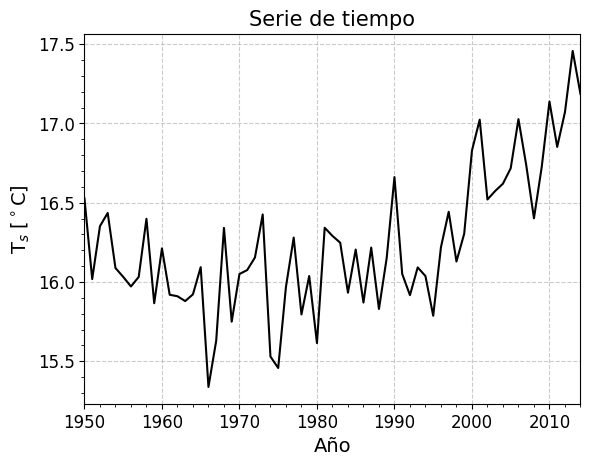

In [38]:
plot_celsius=tas_mex_annual-273.15
plt.plot(plot_celsius.time.dt.year,plot_celsius,c='k')
lineplot_setup(1950,2014,'Año','T$_s$ [$^\circ$C]',title='Serie de tiempo')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 3 - Operaciones con datos avanzadas </font>**

<font color="DarkBlue"> 1. Seleccione los datos correspondientes del arreglo `tas` en un punto del planeta en las latitudes extratropicales (hacia los polos de la línea de 40$^\circ$). Explique qué punto escogió y por qué.  
    
<font color="DarkBlue">  2.  Calcule la desviación estándar de la serie de tiempo de su punto escogido y compárela con la std de la serie de tiempo del arreglo `tas_mex`. 
    
<font color="DarkBlue"> 3. Grafique la serie de tiempo de sus datos una vez resampleados a una frecuencia cada lustro y compárela con una serie de tiempo similar pero para los datos del punto en México.
    
---

In [52]:
lat1 = 66.5
long = 180
tas_green=tas.sel(lat=lat1,lon= long, method = 'nearest')

In [45]:
lat1 = 70
long = 180
std_3 = tas_green.std()
std_mex = tas_mex.std()
print('Mi latitud:', std_3, 'La de México:', std_mex)

Mi latitud: <xarray.DataArray 'tas' ()> Size: 4B
array(15.840271, dtype=float32)
Coordinates:
    lat      float64 8B 66.88
    lon      float64 8B 180.9
    height   float64 8B ... La de México: <xarray.DataArray 'tas' ()> Size: 4B
array(2.1518424, dtype=float32)
Coordinates:
    lat      float64 8B 19.38
    lon      float64 8B 259.7
    height   float64 8B ...


In [46]:
new_time3 = tas_green.resample(time='5Y').mean()
time_mex = tas_mex.resample(time='5Y').mean()

<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


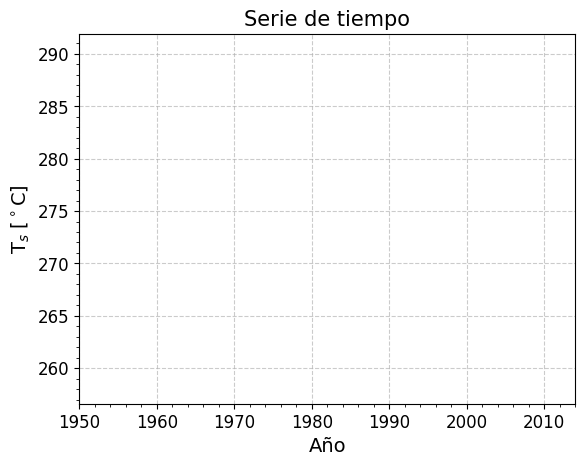

In [51]:
#plot_celsius=tas_mex_annual-273.15
plt.plot(new_time3,c='k')
plt.plot(time_mex,c='pink')
lineplot_setup(1950,2014,'Año','T$_s$ [$^\circ$C]',title='Serie de tiempo')